# Introduction

Many of my friends have been sharing this "analysis" of the Massachusetts Democratic Primary exit poll and results [1] to claim that the official results are "rigged" toward the shittier candidates (Biden and Bloomberg) and away from the better candidates (Sanders and Warren). While I agree with their assessments of these candidates, using this jupyter notebook, I wish to ~~point out that this analysis of the discrepancy between the exit poll and the vote count is complete horseshit~~ introduce much-needed skepticism about skepticism into the Berniesphere discourse [a].

I caution my fellow progressives to stop wallowing in narratives of "rigged" when there are doors to be knocked -- even in the night hours, when the Bernie dialer is down. Such complaints encourage apathy and are arguably a form of voter suppression.

Conspiracy theories in the Berniesphere suggest why we need Bernie in the first place: they are symptoms of high wealth inequality, a corporate media oligopoly, and widespread social mistrust. It's important to be clear-headed though, and to observe this election as it is, because we can't improve the real world if we're running in our own fantasy world. Telling people vote counts are rigged serves only to increase social mistrust and make our task of building the trust in our movement more difficult. We need people to trust Bernie, and trust that voting can help bring about political revolution.

Of course, we must work hard to ensure elections are secure and access to the ballot is a human right. I support Bernie in part because he will end voter suppression everywhere---even in prisons.

[1] http://tdmsresearch.com/2020/03/04/massachusetts-2020-democratic-party-primary/

[a] One of my fellow Berniebrothersandsisters pointed out that I approach things from an irresponsible perspective: "I gather you think it is irresponsible to call things 'rigging.' That is not my orientation. I see it [as] irresponsible to assume accurate results that are impossible to verify." (These results are completely possible to verify if we put election challenge energy there.)

*This document was prepared hastily and distractedly, indeed at some moments while I was talking to voters for Bernie. Please notify me if you spot any errors.*

# First, the numbers used in the analysis are not the correct numbers.

The author of [1] cites an exit poll that only he seems to have seen in which 1,394 respondents answered the gender question. From this, he estimates the topline Bernie vote share as 30.4%. In fact, in the Edison Research poll available, one finds 1,443 respondents to the gender question, from which we estimate the Bernie share as 20.8% (see next section). To account for this discrepancy, the author, in his conspiratorial tone, writes:
<blockquote>As this first published exit poll was subsequently adjusted towards conformity with the final computerized vote count, the currently published exit poll differs from the results above.</blockquote>

It's likely that the author found an **incomplete version of the exit poll missing 49 respondents** taken from a Bernie-unfriendly precinct. It's hard to take a simple random sample when you hire only so many pollsters, so pollsters visit different precincts with different demographics. Edison may have accidentally posted an early version of the poll that was missing data from a rich Boston suburb full of Biden/Bloomberg Massholes.

Please do not think that Bill Galvin (as shitty as he is) called up Edison Research and said "I'm rigging it away from Bernie" and then Edison Research added 49 respondents to the poll and got CNN to change the numbers on its website. This is insane.

# The easiest-to-explain problem with the analysis (seemingly small, but it influences all future computations)

In the US, the media often refrain from giving topline numbers when publishing exit polls (ie, they do not give the percentage of the population that voted for each candidate). I assume this is a form of caution, to avoid creating confusion. After all, an exit poll is a *sample*, taken before the ballots are counted, and thus is imprecise.

But fear not: we can *estimate* the topline numbers. The exit polls provide (rounded) election results for each subpopulation when the population is partitioned across each probed demographic category (age, gender, religion, education level, etc.). These data help the decision desk project results in missing precincts from demographic information, and they help researchers too [a]. We can see what fraction of the males surveyed voted for each candidate, and what fraction of females voted for each candidate, and we can see what fraction of the population is male and what fraction female [b]. 

We estimate the topline numbers using the law of total probability. For instance, here's how we could compute Bernie's topline number:

$$P(\texttt{bernie}) = P(\texttt{bernie}|\texttt{male respondent})P(\texttt{male respondent}) + P(\texttt{bernie}|\texttt{female respondent})P(\texttt{female respondent}).$$

This is indeed what the author of [1] does. He writes:
<blockquote>Note: The exit poll vote proportions for each candidate was derived from the gender category. Candidate’s share of the male vote was multiplied with the total male proportion and added to the candidate’s proportion of the female vote multiplied with the total female vote to arrive at the candidate’s exit poll share in the state.</blockquote>

These estimates are produced using *rounded* numbers and can in fact be more than a percentage point off. The estimate in [1] is supposedly based on an exit poll in which 1,394 respondents answered the gender question. We don't have the full crosstabs and cannot estimate rounding error, but it could be **over 1%**---and affect MOE computations themselves.

As an example, we can estimate the Sanders total using the gender crosstab in the offical Edison Research exit poll [2] as (using the above formula) $0.31 \cdot 0.44 + 0.26 \cdot 0.56$ or 28.2%, but if we use race (80% white, 20% nonwhite), we get $0.28 \cdot 0.8 + 0.30 \cdot 0.2$ or 28.4%; age (38% young, 62% old), $0.44 \cdot 0.38 + 0.19\dot 0.62 =$ 28.5%; or education (53% college grad, 47% no degree), $0.24\cdot 0.53 + 0.34\cdot 0.47$ = 28.7%. These questions all have slightly different numbers of respondents (one or two people might have skipped the question) but the biggest contribution to these errors in estimating candidate vote share is **rounding**. If you estimate the difference in vote share from these rounded estimates, *error only increases*.

[2] https://edition.cnn.com/election/2020/entrance-and-exit-polls/massachusetts/democratic

[a] An alternative way of doing this is to produce "ecological exit polls"---polls that estimate *voter* profiles from precinct-level *population* profiles and election results---which the folks at Data for Progress are doing. They do a lot of cool stuff, and I think their blog is fun to read. In short, both methods are flawed but provide good insight.

[b] There is typically, as of the 2020 primary, no nonbinary option.

# Now we'll get into the margin-of-error (MOE) calculations

First we need to import some programming tools.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Margin of error (MOE) in a "binomial exit poll"

Let's consider a large state whose voters all exhibit identical behavior. Each person goes to the polls on Election Day and pulls out the Massachusetts state coin, which has a probability $p$ of coming up heads and probability $1-p$ of coming up tails. They pull up the curtain, they flip the coin, and they mark $\texttt{bernie}$ if the coin comes up heads, $\texttt{biden}$ if tails.

The corporate news media refuses to cover issues. They never talk about climate change (droughts and desertification alone could create 700 million climate refugees by 2030 if we don't massively invest in water infrastructure now! we don't really understand how all this melting freshwater will affect the ocean currents that determine are weather! we need a Green New Deal! we need free public healthcare! &c.). They talk only about the horse race. As part of their deep investment in distracting people from the issues, the corporate news media pays Edison research to conduct an exit poll for the folks working the news channels' decision desks. This paid distraction doubles as a public service: exit polls can give evidence of election failure.

Our exit pollsters take a simple random sample of $N$ voters coming out of their polling places. Let us suppose these voters all accurately report their vote to the pollsters, and they accurately report the results.

What is the "margin of error" of this sample?

Let's first look at an example. Let's take ten different random samples of 1000 voters.

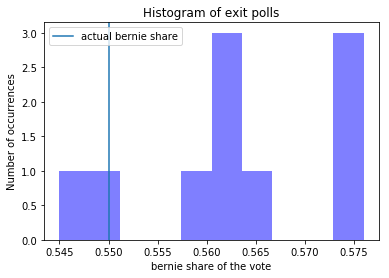

In [2]:
N = 1000 # number of voters
p_bernie = 0.55 # probability of a bernie vote
p_biden = 1-p_bernie # probability of a biden vote

def get_sample(N, p_bernie, p_biden):
    assert np.isclose(p_bernie + p_biden,1) # only two candidates
    rand = np.random.uniform(0, 1, N) # flip the coins
    is_bernie_vote = (rand <= p_bernie) # see which came up bernie
    N_bernie = np.sum(is_bernie_vote) # count the bernie votes
    N_biden = N - N_bernie # number of biden votes
    return (N_bernie, N_biden)

bernie_counts = []
for sample in range(10): # do ten independent exit polls of the same (infinitely large) election
    N_bernie, _ = get_sample(N, p_bernie, p_biden)
    bernie_counts.append(N_bernie/N)
    
plt.figure()
n, bins, patches = plt.hist(bernie_counts, bins=10, facecolor='blue', alpha=0.5)
plt.axvline(x=p_bernie, label="actual bernie share")
plt.xlabel('bernie share of the vote')
plt.ylabel('Number of occurrences')
plt.title('Histogram of exit polls')
plt.legend()
plt.show()

These samples seem scattered about, and it's not super clear how we can determine the margin of error of each trial. Let's try 500 independent exit polls.  By "indpendent" I mean they are exit pols of an infinitely large population, or one where voters just hang out by the exit of their polling place all day so they can in theory be interviewed multiple times. In statistics jargon, the sampling fraction is small. It is not hard to correct for nonneglible sampling fractions.

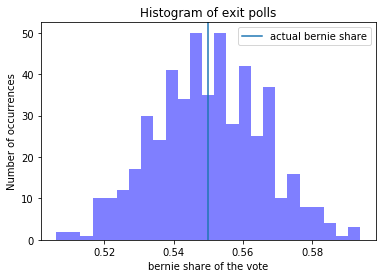

In [3]:
bernie_counts = []
for sample in range(500): # do ten independent exit polls of the same (infinitely large) election
    N_bernie, _ = get_sample(N, p_bernie, p_biden)
    bernie_counts.append(N_bernie/N)
    
plt.figure()
n, bins, patches = plt.hist(bernie_counts, bins=25, facecolor='blue', alpha=0.5)
plt.axvline(x=p_bernie, label="actual bernie share")
plt.xlabel('bernie share of the vote')
plt.ylabel('Number of occurrences')
plt.title('Histogram of exit polls')
plt.legend()
plt.show()

This is starting to look like the more familiar bell curve centered around the actual Bernie share of the inifinitely large state (ie, centered around $p(\texttt{bernie}) = 0.55$).

Formally, each exit poll conducted can be seen as the sum of $N$ Bernoulli trials, each identically distributed with mean paramater $p=p(\texttt{bernie})$ and variance $p(1-p)$. Such a sum is called a *binomial random variable*. Its probability mass function can be derived using a simple combinatorial argument, which we omit here. The probability of finding $ k \texttt{ bernie}$ votes in a sample of size $N$ with probability of Bernie vote $p=p(\texttt{bernie})$ is ${N \choose k}p^k(1-p)^{N-k}$. Through a simple application of the linearity of expectation, we can show that the binomial random variable representing the number of votes for Bernie in an exit poll has mean $Np$ and variance $Np(1-p)$.

For large sample sizes $N$ (out of a much larger population of voters), our exit poll result is well approximated by a normal random variable with mean $Np$ and variance $Np(1-p)$. Pollsters typically work with such normal approximations to derive margins of error. But before showing the approximation, let us first transform this binomial random variable using the scaling property of variance [a] to define a random variable that is Bernie's share of the vote (ie, the number of $\texttt{bernie}$ votes divided by $N$) to bring our variable of vote counts into a vote share.

Here we replicate the above experiment, first normalizing our histogram to represent a probability mass function, and plot it alongside its (continuous) normal approximation. Our mean, having been divided by $N$ (using the linearity of expectation), becomes $p$ and our variance, scaled by $\frac{1}{N^2}$, becomes $\frac{p(1-p)}{N}$.

[a] For any random variable $X$ and scalar $\alpha$, we have that $$\mathrm{Var}(\alpha X) = \alpha^2 \mathrm{Var}(X).$$

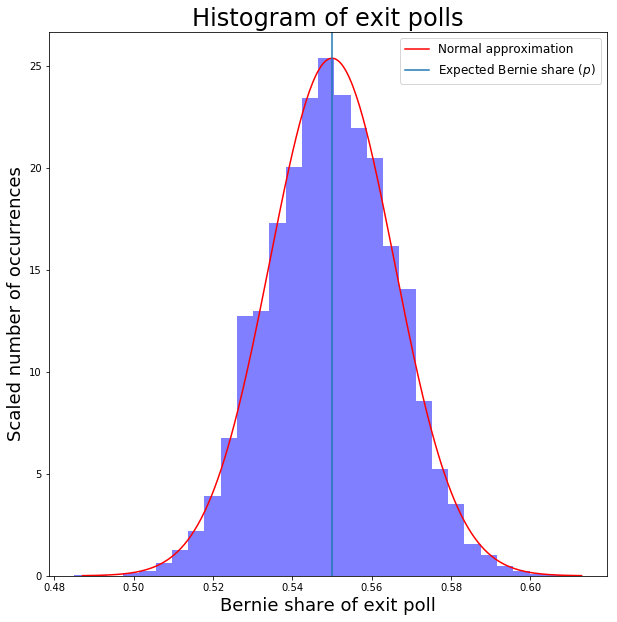

In [4]:
bernie_shares = []
for sample in range(10000): # do ten independent exit polls of the same (infinitely large) election
    N_bernie, _ = get_sample(N, p_bernie, p_biden)
    bernie_shares.append(N_bernie/N)
    
plt.figure(figsize=(10,10))
n, bins, patches = plt.hist(bernie_shares, bins=30, facecolor='blue', alpha=0.5, density=True)
mu = p_bernie
sigma = np.sqrt(p_bernie*(1-p_bernie)/N)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 300)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='r', label="Normal approximation")
plt.axvline(x=p_bernie, label=r"Expected Bernie share ($p$)")
plt.xlabel('Bernie share of exit poll', fontsize=18)
plt.ylabel('Scaled number of occurrences', fontsize=18)
plt.title('Histogram of exit polls', fontsize=24)
plt.legend(fontsize=12)
plt.show()

Sidenote: this approximation is worse the farther we are from a fifty-fifty vote split. But $N$ is lare enough that this isn't a real problem until we get to probabilities of voting for Bernie or Biden that are consistent with a dictatorship's show election.

Let us now report the *margin of error* with respect to this normal approximation to the binomial random variable. With just two choices, the binomial random variables corresponding to the Bernie vote total in the sample and Biden vote total are equal. Thus, the normal approximations have the same variance and differ only in mean.

Let $z_{k}$ be the number of standard deviations away from the mean beyond which only $100-k$% of probability mass of a normal lies in the tails. For a 95% confidence interval we use $z_{95} \approx 1.96$ and for 99% $z_{99} \approx 2.58$.

In our example, the true value of $p(\texttt{bernie}) = 0.55$, so the true variance of our distribution of exit polls of size 1000 is $\frac{0.55\cdot (1-0.55)}{1000} \approx 0.00025$, and the standard deviation [a] is thus the square root of that, about 0.016. Thus, our margin of error here is 1.6%.

In reality, with just one exit poll, we don't know the underlying value of that Massachusetts coin, that is, the real value of $p(\texttt{bernie})$, and so we don't know true variance of the normal approximation to the distribution of exit poll results. But if we plug in our exit poll result most of the time the estimated variance is nearly correct!

[a] The standard error of the mean, ie, the square root of the variance of our exit poll results, their deviation around the mean of exit poll results $p(\texttt{bernie})$.

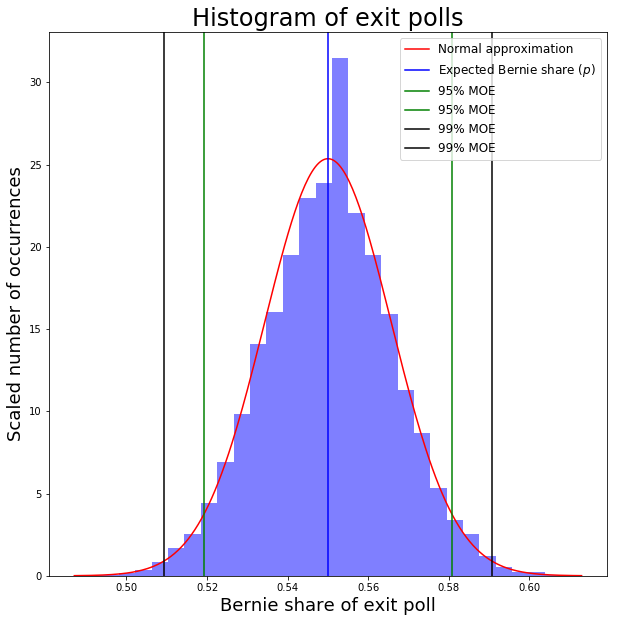

In [5]:
bernie_shares = []
for sample in range(10000): # do ten independent exit polls of the same (infinitely large) election
    N_bernie, _ = get_sample(N, p_bernie, p_biden)
    bernie_shares.append(N_bernie/N)
    
plt.figure(figsize=(10,10))
n, bins, patches = plt.hist(bernie_shares, bins=30, facecolor='blue', alpha=0.5, density=True)
mu = p_bernie
sigma = np.sqrt(p_bernie*(1-p_bernie)/N)
dx_95 = 1.96*sigma
dx_99 = 2.58*sigma
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 300)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='r', label="Normal approximation")
plt.axvline(x=p_bernie, label=r"Expected Bernie share ($p$)", color='b')
plt.axvline(x=p_bernie+dx_95, label='95% MOE', color='g')
plt.axvline(x=p_bernie-dx_95, label='95% MOE', color='g')
plt.axvline(x=p_bernie+dx_99, label='99% MOE', color='k')
plt.axvline(x=p_bernie-dx_99, label='99% MOE', color='k')
plt.xlabel('Bernie share of exit poll', fontsize=18)
plt.ylabel('Scaled number of occurrences', fontsize=18)
plt.title('Histogram of exit polls', fontsize=24)
plt.legend(fontsize=12)
plt.show()

# MOE of a multinomial exit poll: the intended case for the formula used in [1]



Suppose Massachusetts ditches the coin and rolls out a state die, which voters roll before voting. For the sake of simplicity, let us say it is three-sided, with each side given the label of the candidate voters must vote for after a fair toss: $\texttt{bernie}, \texttt{biden},$ and $\texttt{tulsi}$. This die is not fair and has chance $p(\texttt{bernie}), p(\texttt{biden})$, and $p(\texttt{tulsi})$ of landing with that candidate's name face-up. Here, the result of each vote [a] is a type of random variable that is a little more general than a Bernoulli trial---sometimes it's called a multinoulli trial---and vote totals are distributed according to something that's a little more general than a binomial distribution: the multinomial distribution.

Let us take a simple random sample of size $N=1000$ and let $X$ be random variable corresponding to the number of Bernie votes in the sample, $Y$ the number of Biden votes, and $Z$ the number of Tulsi votes. The author of [1] is interested in the distribution of the Bernie-Biden margin $D=X-Y$. Let $\mu_{X}$ be the expected value of $X, \mathbb{E}[X]$, and $\mu_Y, \mathbb{E}[Y]$.

Then by linearity of expectation $$\mathbb{E}[D] = \mathbb{E}[X-Y] = \mathbb{E}[X] - \mathbb{E}[Y] = \mu_X - \mu_Y.$$

Let's call this expected value $\mu_D$.

The variance of $D$ is $D$'s expected squared deviation from its mean. We can relate it, via the sum of variance formula [b], to the variance of $X$, the variance of $Y$, and the covariance between $X$ and $Y$:

$$\mathrm{Var}(D) = \mathrm{Var}(X-Y) = \mathrm{Var}(X) + \mathrm{Var}(Y) - 2\mathrm{Cov}(X,Y).$$

We know that $X,Y,$ and $Z$ are multinomial random variables. For a multinomial random variable $X$---a count of number of times the die landed with the corresponding face up in $N$ trials--- we know that if the probability of the die landing with that face up is $p$, the expected value $\mathbf{E}[X] = Np$ and the variance $\mathrm{Var}(X)$ is $Np(1-p)$. The covariance between two distinct multinomial random variables $X$ and $Y$ (with associated mutually exclusive event probabilities $p$ and $q$, respectively), the covariance between the two variables is $-Npq$.

Thus, $$\mathrm{Var}(D) = Np(1-p) + Nq(1-q) +2Npq.$$

The difference between $X$ and $Y$ as a share of total vote $D_s = \frac{X-Y}{N}$ has variance $\frac{\mathrm{Var}(D)}{N^2} = \frac{p(1-p) + q(1-q) + 2pq}{N}$. Let's massage this a bit:
$\begin{align}
\mathrm{Var}(D_s) &= \frac{p-p^2 + q - q^2 + 2pq}{N}\\
&= \frac{(p+q) - (p^2-2pq+q^2)}{N}\\
&= \frac{(p+q)-(p-q)^2}{N}.
\end{align}$

Thus, if we know the underlying probabilities $p$ and $q$ of landing face-up for candidates $X$ and $Y$ on the Massachusetts Voter Die, we can compute the resulting variance of the difference in vote share in an exit poll of $N$ voters. From this we can get the standard deviation $\frac{(p+q)-(p-q)^2}{N}$ and choose a margin of error of $z_{95} \approx 1.96$ or $z_{99} \approx 2.58$ standard deviations.

You'll notice that this looks almost identical to the formula 6.2 of [2], the reference cited by [1]. The only difference is that we divide by $N$ here and they divide by $N-1$. This is because they don't know the underlying die probabilities and are estimating them from one exit poll. They use an *unbiased* estimate (divided by $N-1$) rather than the maximum-likelihood estimate (divide by $N$). This doesn't affect the computed margin of error much and if we want to be Bayesian we could get a *distribution* over what we think the standard error is, rather than a "best guess" since there are many ways to define "best."

How do we know that this difference in votes $X-Y$ or difference in vote share $\frac{X-Y}{N}$ is well-approximated by a Gaussian (for $N$ sufficiently big and $p$ and $q$ sufficiently far from 0 and 1)? Well that's another discussion but my short hand-wavey answer is the following: "Gaussians remain Gaussian after scaling and after convolution."

[a] Each vote is independent and identically distributed according to this *categorical* (or multinoulli) distribution 

[b] This is easily shown by the expansion of quadratics and repeated application of linearity of expectation on $\mathbb{E}[(D-\mu_D)^2] = \mathbb{E}[(X-Y-\mu_X + \mu_Y)^2]$ and by noting that $\mathrm{Cov}(X,Y) = \mathbf{E}[(X-\mu_x)(Y-\mu_Y)]$.

[2] https://abcnews.go.com/images/PollingUnit/MOEFranklin.pdf


Let's look at how this MOE computation works in its intended environment. In this example we have three candidates on our die, and the probability of the die landing with the Bernie side up is 0.42, Biden 0.4, and Tulsi 0.18. We still have 1000 voters in each exit poll.

95% CI (Bernie): +/- 3.1%
99% CI (Bernie): +/- 4.0%
95% CI (Biden): +/- 3.0%
99% CI (Biden): +/- 4.0%
95% CI (Tulsi): +/- 2.4%
99% CI (Tulsi): +/- 3.1%


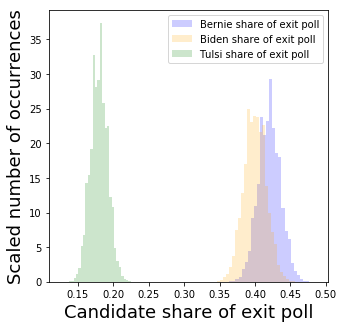

In [6]:
p_bernie = 0.42
p_biden = 0.40
p_tulsi = 0.18

def get_sample_multinomial(N, p_bernie, p_biden, p_tulsi):
    assert np.isclose(p_bernie + p_biden + p_tulsi,1) # only three candidates
    rand = np.random.uniform(0, 1, N) # roll the dice
    is_bernie_vote = (rand <= p_bernie) # see which came up bernie
    is_biden_vote = np.logical_and(rand > p_bernie, rand <= p_bernie+p_biden) #see which came up biden
    N_bernie = np.sum(is_bernie_vote) # count the bernie votes
    N_biden = np.sum(is_biden_vote) # number of biden votes
    N_tulsi = N-N_bernie-N_biden
    return (N_bernie, N_biden, N_tulsi)


bernie_shares = []
biden_shares = []
tulsi_shares = []
bernie_minus_biden = []
for sample in range(50000): # do ten independent exit polls of the same (infinitely large) election
    N_bernie, N_biden, N_tulsi = get_sample_multinomial(N, p_bernie, p_biden, p_tulsi)
    bernie_shares.append(N_bernie/N)
    biden_shares.append(N_biden/N)
    tulsi_shares.append(N_tulsi/N)
    bernie_minus_biden.append((N_bernie-N_biden)/N)

sigma_bernie = np.sqrt(p_bernie*(1-p_bernie)/N)
sigma_biden = np.sqrt(p_biden*(1-p_biden)/N)
sigma_tulsi = np.sqrt(p_tulsi*(1-p_tulsi)/N)

print(f"95% CI (Bernie): +/- {np.round(1.96*sigma_bernie*100,1)}%")
print(f"99% CI (Bernie): +/- {np.round(2.58*sigma_bernie*100,1)}%")

print(f"95% CI (Biden): +/- {np.round(1.96*sigma_biden*100,1)}%")
print(f"99% CI (Biden): +/- {np.round(2.58*sigma_biden*100,1)}%")

print(f"95% CI (Tulsi): +/- {np.round(1.96*sigma_tulsi*100,1)}%")
print(f"99% CI (Tulsi): +/- {np.round(2.58*sigma_tulsi*100,1)}%")

plt.figure(figsize=(5,5))
n, bins, patches = plt.hist(bernie_shares, bins=30, facecolor='blue', alpha=0.2, density=True, label="Bernie share of exit poll")
n, bins, patches = plt.hist(biden_shares, bins=30, facecolor='orange', alpha=0.2, density=True, label="Biden share of exit poll")
n, bins, patches = plt.hist(tulsi_shares, bins=30, facecolor='green', alpha=0.2, density=True, label="Tulsi share of exit poll")
plt.xlabel('Candidate share of exit poll', fontsize=18)
plt.ylabel('Scaled number of occurrences', fontsize=18)
plt.legend()
plt.show()




Since $p(1-p)$ is lowest for $p$ nearer to 0 or 1, in this example Tulsi's vote share has the lowest variance and Bernie's the highest.

Now lets plot a histogram of the Bernie minus Biden difference. Notice the variance of the difference is larger than the (nearly equal) variances of the Bernie share and Biden share.

95% theoretical CI (Bernie minus Biden): +/- 5.7%
99% theoretical CI (Bernie minus Biden): +/- 7.5%
95% empirical CI (Bernie minus Biden): +/- 5.6%
99% empirical CI (Bernie minus Biden): +/- 7.4%


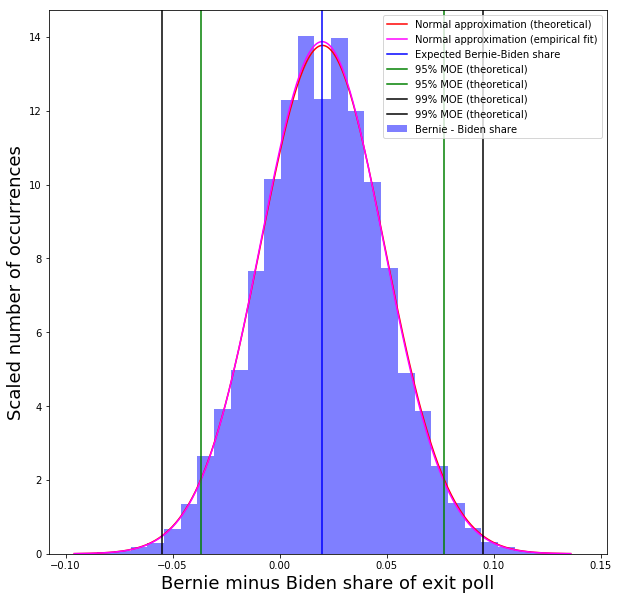

In [7]:
plt.figure(figsize=(10,10))
n, bins, patches = plt.hist(bernie_minus_biden, bins=30, facecolor='blue', alpha=0.5, density=True, label="Bernie - Biden share")
mu = p_bernie - p_biden
sigma = np.sqrt(((p_bernie+p_bernie) - (p_bernie-p_biden)**2)/N)
sigma_empirical = np.std(bernie_minus_biden)
mu_empirical = np.mean(bernie_minus_biden)
dx_95 = 1.96*sigma
dx_99 = 2.58*sigma
print(f"95% theoretical CI (Bernie minus Biden): +/- {np.round(dx_95*100,1)}%")
print(f"99% theoretical CI (Bernie minus Biden): +/- {np.round(dx_99*100,1)}%")
print(f"95% empirical CI (Bernie minus Biden): +/- {np.round(1.96*sigma_empirical*100,1)}%")
print(f"99% empirical CI (Bernie minus Biden): +/- {np.round(2.58*sigma_empirical*100,1)}%")

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 300)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='r', label="Normal approximation (theoretical)")
plt.plot(x, stats.norm.pdf(x, mu_empirical, sigma_empirical), color='magenta', label="Normal approximation (empirical fit)")
plt.axvline(x=p_bernie-p_biden, label=r"Expected Bernie-Biden share", color='b')
plt.axvline(x=mu+dx_95, label='95% MOE (theoretical)', color='g')
plt.axvline(x=mu-dx_95, label='95% MOE (theoretical)', color='g')
plt.axvline(x=mu+dx_99, label='99% MOE (theoretical)', color='k')
plt.axvline(x=mu-dx_99, label='99% MOE (theoretical)', color='k')
plt.xlabel('Bernie minus Biden share of exit poll', fontsize=18)
plt.ylabel('Scaled number of occurrences', fontsize=18)
plt.legend()
plt.show()



We can start to see how, knowing the multinomial model parameters (the die weights)---or even having a good estimate of them from the exit poll results themselves---computing MOEs using a Gaussian approximation of the multinomial model might be a reasonable thing to do.

Unfortunately, vote counts are not multinomial random variables.

# Applying the MOE derived for a multinomial exit poll to a heterogeneous population made of cohorts with distinct voter behavior

Taking a look at the Edison Research exit poll, we see there is a clear distinction in vote choice when we segment voters by age. The 38% of voters in the younger age groups voted Biden 21%, Bloomberg 4%, Sanders 44%, and Warren 24%. Of the 62% of voters in the older age groups, 42% voted for Biden, 15% for Bloomberg, 19% for Sanders, and 18% for Warren. The percentages within each age group don't sum to 100% because there were other candidates on the ballot (for instance, some confused voters chose uncommitted, and some really confused voters chose Tulsi). Let's rescale them to 23, 4, 47, and 26 for the younger groups and 45, 16, 20, and 19 for the older groups for Biden, Bloomberg, Sanders, and Warren, respectively.

Here's our new model: Massachusetts mails a four-sided dice to each voter. Voters under 45 each get a die weighted 23-4-47-26 for Biden, Bloomberg, Sanders, and Warren, respectively, while voters over 45 get dice weighted 45-16-20-19. Voters roll the dice and vote the side that's face-up. They honestly tell exit pollsters who they voted for. Each exit poll of size $N=1000$ may be regarded as a simple random sample (pollsters don't oversample old or young voters except by chance).

We still compute MOEs using the formula derived when vote tallies in an exit poll were assumed to be multinomial random variables.

[a] Note that this model is silly and oversimplified but it captures a scenario where the exit polls fail to be realizations of a multinomial random variable. In some ways it's "more binomial" than the actual results, in that it breaks the population into only two heterogeneous cohorts. The youngest cohort within the under-45 voters was the most pro-Sanders, with Sanders beating Biden 54%-17%. Thus, slightly oversampling the smaller population cohort of voters aged 18-24 could substantially move the poll in Bernie's direction!

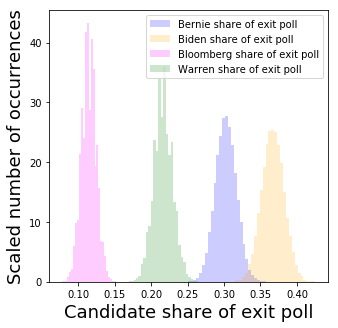

95% CI theoretical (Bernie minus Biden): +/- 4.8%
99% CI theoretical (Bernie minus Biden): +/- 6.3%
95% CI emprical (Bernie minus Biden): +/- 5.0%
99% CI empirical (Bernie minus Biden): +/- 6.6%


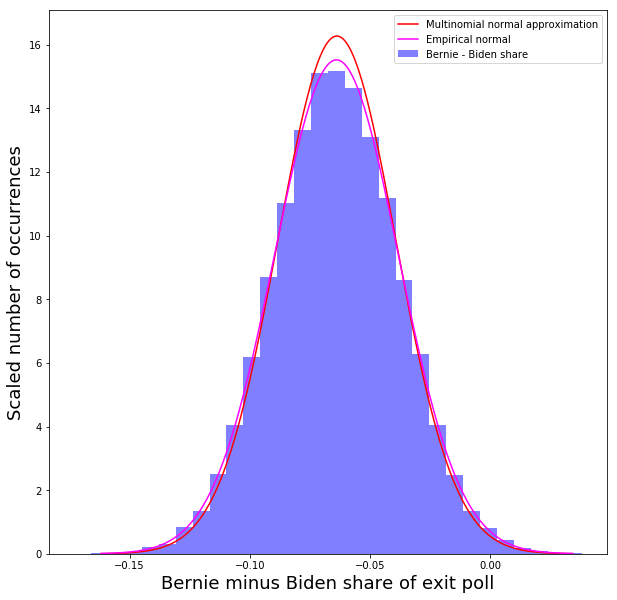

In [8]:
p_young = 0.38
p_old = 0.62

p_bernie_young = 0.47
p_biden_young = 0.23
p_bloomberg_young = 0.04
p_warren_young = 0.26

p_bernie_old = 0.20
p_biden_old = 0.45
p_bloomberg_old = 0.16
p_warren_old = 0.19

def get_sample_twogroups(N, p_young, p_old, p_bernie_young, 
                           p_biden_young, p_bloomberg_young, 
                           p_warren_young, p_bernie_old, p_biden_old,
                           p_bloomberg_old, p_warren_old):
    
    ## Check our numbers to see if they're valid probabilities
    assert np.isclose(p_young+p_old, 1) # young or old
    assert np.isclose(p_bernie_young+p_biden_young+p_bloomberg_young+p_warren_young, 1) # young vote for only four candidates
    assert np.isclose(p_bernie_old+p_biden_old+p_bloomberg_old+p_warren_old, 1) # old vote for only four candidates
    
    # See which voters are young and old
    old_voters = (np.random.uniform(0, 1, N) <= p_old)# flip the coin to see if voter old
    young_voters = np.logical_not(old_voters) # voter is young if not old
    
    # Compute the votes of young and old votes
    votes = np.random.uniform(0, 1, N) # roll the dice for the vote
    
    bernie_young = votes <= p_bernie_young # the die came up bernie IF voter was young
    bernie_old = votes <= p_bernie_old # the die came up bernie IF the voter was old
    N_bernie_young = np.sum(np.logical_and(bernie_young, young_voters)) # total number bernie votes from young voters
    N_bernie_old = np.sum(np.logical_and(bernie_old, old_voters)) # total number bernie votes from old voters
    
    biden_young = np.logical_and(votes > p_bernie_young, votes <= p_bernie_young+p_biden_young) # the die came up biden IF the voter was young
    biden_old = np.logical_and(votes > p_bernie_old, votes <= p_bernie_old+p_biden_old) # the die came up biden IF the voter was old
    N_biden_young = np.sum(np.logical_and(biden_young, young_voters)) # the number of young biden votes
    N_biden_old = np.sum(np.logical_and(biden_old, old_voters)) # number of old biden votes

    bloomberg_young = np.logical_and(votes > p_bernie_young+p_biden_young, 
                                     votes <= p_bernie_young+p_biden_young+p_bloomberg_young) # die came up bloomberg IF the voter was young
    bloomberg_old = np.logical_and(votes > p_bernie_old+p_biden_old, 
                                   votes <= p_bernie_old+p_biden_old+p_bloomberg_old) # die came up bloomberg IF the voter was old
    N_bloomberg_young = np.sum(np.logical_and(bloomberg_young, young_voters)) # number of young bloomberg votes (ha!)
    N_bloomberg_old = np.sum(np.logical_and(bloomberg_old, old_voters)) # number of old bloomberg votes

    
    warren_young = np.logical_and(votes > p_bernie_young+p_biden_young+p_bloomberg_young, 
                                     votes <= p_bernie_young+p_biden_young+p_bloomberg_young+p_warren_young) #die came up warren IF the voter was young
    warren_old = np.logical_and(votes > p_bernie_old+p_biden_old+p_bloomberg_old, 
                                   votes <= p_bernie_old+p_biden_old+p_bloomberg_old+p_warren_old) # die came up warren IF the voter was old
    N_warren_young = np.sum(np.logical_and(warren_young, young_voters)) #number of warren votes from the young
    N_warren_old = np.sum(np.logical_and(warren_old, old_voters)) # number of warren votes from the old

    N_bernie = N_bernie_young + N_bernie_old # total number of bernie votes
    N_warren = N_warren_young + N_warren_old # total number of warren votes
    N_biden = N_biden_young + N_biden_old # total number of biden votes
    N_bloomberg = N_bloomberg_young + N_bloomberg_old # total number of bloomberg votes
    
    return (N_bernie, N_biden, N_bloomberg, N_warren)


bernie_shares = []
biden_shares = []
bloomberg_shares = []
warren_shares = []
bernie_minus_biden = []
for sample in range(50000): # do ten independent exit polls of the same (infinitely large) election
    N_bernie, N_biden, N_bloomberg, N_warren = get_sample_twogroups(N, p_young, p_old, 
                                                                    p_bernie_young, p_biden_young, 
                                                                    p_bloomberg_young, p_warren_young,
                                                                    p_bernie_old, p_biden_old, 
                                                                    p_bloomberg_old, p_warren_old)
    bernie_shares.append(N_bernie/N)
    biden_shares.append(N_biden/N)
    bloomberg_shares.append(N_bloomberg/N)
    warren_shares.append(N_warren/N)
    bernie_minus_biden.append((N_bernie-N_biden)/N)

plt.figure(figsize=(5,5))
n, bins, patches = plt.hist(bernie_shares, bins=30, facecolor='blue', alpha=0.2, density=True, label="Bernie share of exit poll")
n, bins, patches = plt.hist(biden_shares, bins=30, facecolor='orange', alpha=0.2, density=True, label="Biden share of exit poll")
n, bins, patches = plt.hist(bloomberg_shares, bins=30, facecolor='magenta', alpha=0.2, density=True, label="Bloomberg share of exit poll")
n, bins, patches = plt.hist(warren_shares, bins=30, facecolor='green', alpha=0.2, density=True, label="Warren share of exit poll")
plt.xlabel('Candidate share of exit poll', fontsize=18)
plt.ylabel('Scaled number of occurrences', fontsize=18)
plt.legend()
plt.show()


plt.figure(figsize=(10,10))
n, bins, patches = plt.hist(bernie_minus_biden, bins=30, facecolor='blue', alpha=0.5, density=True, label="Bernie - Biden share")
p_bernie = p_bernie_old*p_old + p_bernie_young*p_young
p_biden = p_biden_old*p_old + p_biden_young*p_young
mu = p_bernie-p_biden
sigma = np.sqrt(((p_bernie+p_bernie) - (p_bernie-p_biden)**2)/N)
sigma_empirical = np.std(bernie_minus_biden)
dx_95 = 1.96*sigma
dx_99 = 2.58*sigma
print(f"95% CI theoretical (Bernie minus Biden): +/- {np.round(dx_95*100,1)}%")
print(f"99% CI theoretical (Bernie minus Biden): +/- {np.round(dx_99*100,1)}%")
print(f"95% CI emprical (Bernie minus Biden): +/- {np.round(1.96*sigma_empirical*100,1)}%")
print(f"99% CI empirical (Bernie minus Biden): +/- {np.round(2.58*sigma_empirical*100,1)}%")

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 300)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='r', label="Multinomial normal approximation")
plt.plot(x, stats.norm.pdf(x, np.mean(bernie_minus_biden), sigma_empirical), label="Empirical normal", color='magenta')
plt.xlabel('Bernie minus Biden share of exit poll', fontsize=18)
plt.ylabel('Scaled number of occurrences', fontsize=18)
plt.legend()
plt.show()


In this new experiment, the vote tallies for each candidate in an exit poll were not multinomial random variables. Though our setup was not terribly far from being that which would produce multinomial vote tallies [a], votes were independent but not identically distributed.  

Here we assumed that we knew the multinomial parameters, that is the die weights (and $N$) if Massachusetts had given voters dice with only one set of weights [b], when drawing the red curve, which is the Gaussian approximation of the random variable giving the difference in vote share between Bernie and Biden in an exit poll. This random variable is assumed to be the scaled (by $1/N$) difference between two multinomial random variables. While neither Bernie nor Biden's vote tallies are multinomial in each four-dice simple random sample, the red curve (the Guassian fit assuming multinomial vote tallies) closely matches the empirical Gaussian fit, though it  understates the variance involved (which is not surprising as it understates the number of dice involved in producing each simple random sample).

To produce this fit, we used our godly knowledge of the dice weights and the dice prevalences (ie, the share of voters using each die) to "fit a single die" to the data. (We could have estimated these weights and prevalences from the data instead.) In doing so, we implicitly assumed the covariance between Bernie's vote share $p$ and Biden's vote share $q$ was given by $-pq/N$. Indeed, the empirical covariances (which we will print out between the figures in the examples to follow) are not terribly different from those predicted by our fit to the spurious multinomial model.

**As we will explore in the next two examples, if we have the ability to take a true simple random sample of voting behavior that is a simple mixture of multinoulli trials, and we know these multinoulli parameters, the multinomial MOEs computed will tend to be only a bit wider than the MOEs of a true Gaussian fit to exit poll data.** The multinomial fit will understate the variance, but not by much.

The bigger problem with this spurious multinomial model will come a bit later, when we relax the simple random sample assumption, to account, for instance, for cases where exit polls are missing data from a precinct.

In the next two examples, we split the population into four categories---those who most want a president who "cares about people like me," those who most want a president who will "bring needed change," those who want a president who will "unite the country," and those who want a president who is a "fighter"---and then six age groups. We'll adapt numbers from the (real) Edison Research Massachusetts exit poll for these two examples. (Apologies, here I made my code a bit more concise and simpler to write but much more difficult to read.)

[a] If each vote had been an independent and identically distributed multinoulli trial, the tallies would be multinomial. While each vote was *independent* young voters and old voters had distinct voting patterns. If we "average" these dice using the overall turnout numbers for young and old voters, we have a multinomial model that produces similar vote tallies and vote tally differences, but understates the variance of the underlying random process.

[b] That is, their vote shares in the whole population. (Which could be estimated, for instance, using their vote shares in the exit poll.) These exact vote shares were computed from the multiple-dice scenario using the law of total probability: the "single die weight" for a candidate is the sum of the product of the weights for that candidate for each type of dice with the probability of that dice.

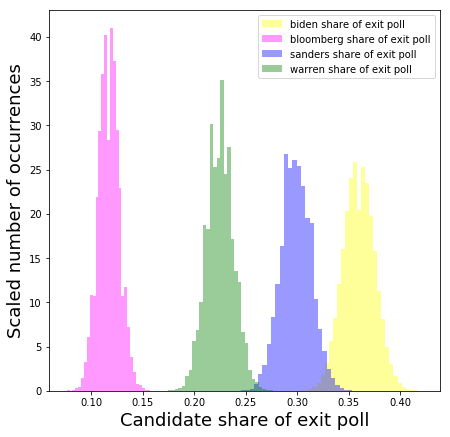

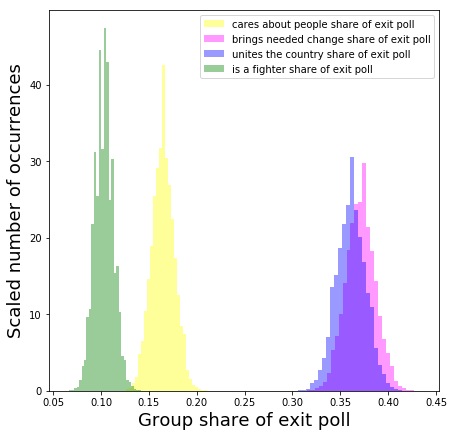

Theoretical (multinomial) covariance between bloomberg (estimated topline vote share: 11.7) and biden (estimated topline vote share: 36.0): -4.202e-05
Empirical covariance between bloomberg (empirical mean share: 11.7) and biden (empirical mean share: 36.0): -4.17e-05
Theoretical (multinomial) covariance between sanders (estimated topline vote share: 29.9) and biden (estimated topline vote share: 36.0): -0.00010746
Empirical covariance between sanders (empirical mean share: 29.9) and biden (empirical mean share: 36.0): -0.00010864
Theoretical (multinomial) covariance between sanders (estimated topline vote share: 29.9) and bloomberg (estimated topline vote share: 11.7): -3.49e-05
Empirical covariance between sanders (empirical mean share: 29.9) and bloomberg (empirical mean share: 11.7): -3.567e-05
Theoretical (multinomial) covariance between warren (estimated topline vote share: 22.5) and biden (estimated topline vote share: 36.0): -8.084e-05
Empirical covariance between warren (empir

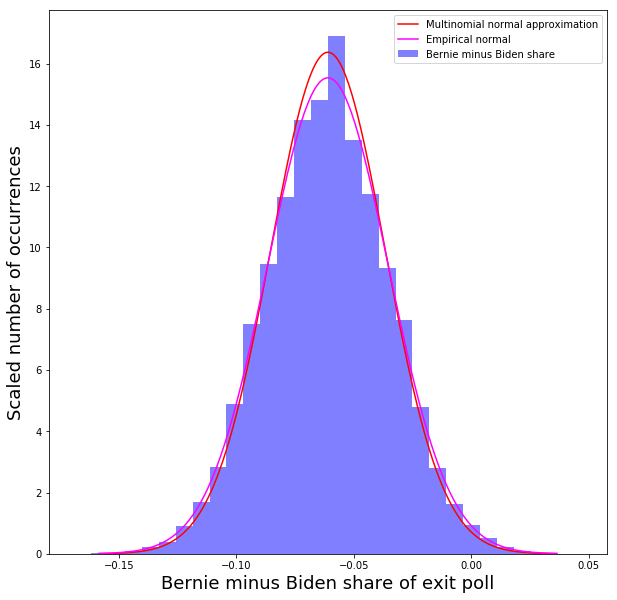

In [9]:
nexitpolls = 50000
cands = ['biden','bloomberg', 'sanders', 'warren']
colors = ['yellow', 'magenta', 'blue', 'green', 'orange', 'black']

def get_sample_from_many_populations(N, p_group, p_candidates_given_group):
    # eh, whatever, nobody will read this so I'll make my code easier to write and harder to read
    n_groups = len(p_candidates_given_group)
    n_candidates = len(p_candidates_given_group[0])
    
    group_random = np.random.uniform(0,1,N)
    groups = np.zeros((N,))
    for prior in np.cumsum(p_group[:-1]):
        groups += group_random <= prior
    groups = (n_groups - 1 - groups).astype('uint8')
        
    vote_random = np.random.uniform(0,1,N)
    vote_list = np.zeros((N,))
    for group_i, candidate_probs in enumerate(p_candidates_given_group):
        for prob in np.cumsum(candidate_probs[:-1]):
            vote_cand_j_if_group_i = vote_random <= prob
            vote_list += np.multiply(vote_cand_j_if_group_i, groups == group_i)
    vote_list = (n_candidates - 1 - vote_list).astype('uint8')
    
    candidates_nos, vote_counts = np.unique(vote_list, return_counts=True)
    final_vote_counts = np.zeros((n_candidates,))
    for c,v in zip(candidates_nos, vote_counts):
        final_vote_counts[c] = v
    group_nos, group_counts = np.unique(groups, return_counts=True)
    final_group_counts = np.zeros((n_groups,))
    for c,v in zip(group_nos, group_counts):
        final_group_counts[c] = v

    return final_group_counts, final_vote_counts

def run_experiment(N, nexitpolls, candidate_given_group_list, priors, groups, cands=cands, colors=colors):
    ncandid = len(candidate_given_group_list[0])
    ngroups = len(candidate_given_group_list)

    exit_poll_results = np.zeros((nexitpolls,ncandid))
    exit_poll_groups = np.zeros((nexitpolls, ngroups))
    for sample in range(nexitpolls):
        group_counts, vote_counts = get_sample_from_many_populations(N, priors, candidate_given_group_list)
        exit_poll_results[sample, :] = vote_counts/N
        exit_poll_groups[sample, :] = group_counts/N
    plt.figure(figsize=(7,7))
    for c in range(ncandid):
        plt.hist(exit_poll_results[:,c], bins=30, facecolor=colors[c], alpha=0.4, density=True, label=f"{cands[c]} share of exit poll")
    plt.xlabel('Candidate share of exit poll', fontsize=18)
    plt.ylabel('Scaled number of occurrences', fontsize=18)
    plt.legend()
    plt.show()

    plt.figure(figsize=(7,7))
    for c in range(ngroups):
        plt.hist(exit_poll_groups[:,c], bins=30, facecolor=colors[c], alpha=0.4, density=True, label=f"{groups[c]} share of exit poll")
    plt.xlabel('Group share of exit poll', fontsize=18)
    plt.ylabel('Scaled number of occurrences', fontsize=18)
    plt.legend()
    plt.show()


    bernie_minus_biden = exit_poll_results[:,2] - exit_poll_results[:,0]
    plt.figure(figsize=(10,10))
    plt.hist(bernie_minus_biden, bins=30, facecolor='blue', alpha=0.5, density=True, label="Bernie minus Biden share")
    p_bernie = np.dot(priors, [x[2] for x in candidate_given_group_list])
    p_biden = np.dot(priors, [x[0] for x in candidate_given_group_list])


    C = np.cov(exit_poll_results.T)
    em = np.mean(exit_poll_results, axis=0)
    for i in range(ncandid):
        for j in range(i):
            p_i = np.dot(priors, [x[i] for x in candidate_given_group_list])
            p_j = np.dot(priors, [x[j] for x in candidate_given_group_list])
            c_ij = np.round(-1*p_i*p_j/N, 8)
            s_i = np.round(100*p_i, 1)
            s_j = np.round(100*p_j, 1)
            ec_ij = np.round(C[i,j], 8)

            print(f"Theoretical (multinomial) covariance between {cands[i]} (estimated topline vote share: {s_i}) and {cands[j]} (estimated topline vote share: {s_j}): {c_ij}")
            print(f"Empirical covariance between {cands[i]} (empirical mean share: {np.round(100*em[i],1)}) and {cands[j]} (empirical mean share: {np.round(100*em[j],1)}): {ec_ij}")


    mu = p_bernie-p_biden
    empirical_mean = np.mean(bernie_minus_biden)
    sigma = np.sqrt(((p_bernie+p_bernie) - (p_bernie-p_biden)**2)/N)
    sigma_empirical = np.std(bernie_minus_biden)
    dx_95 = 1.96*sigma
    dx_99 = 2.58*sigma



    print(f"95% CI theoretical normal fit (Bernie minus Biden): +/- {np.round(dx_95*100,1)}%")
    print(f"99% CI theoretical normal fit (Bernie minus Biden): +/- {np.round(dx_99*100,1)}%")
    print(f"95% CI empirical normal fit (Bernie minus Biden): +/- {np.round(1.96*sigma_empirical*100,1)}%")
    print(f"99% CI empirical normal fit (Bernie minus Biden): +/- {np.round(2.58*sigma_empirical*100,1)}%")
    print(f"Theoretical mean: {np.round(100*mu,1)}%")
    print(f"Empirical mean: {np.round(100*empirical_mean,1)}%")
    print(f"Empirical 97.5 percentile minus empirical mean: {np.round(100*(np.percentile(bernie_minus_biden, 97.5) - empirical_mean),1)}%")
    print(f"Empirical mean minus empirical 2.5 percentile: {np.round(100*(empirical_mean - np.percentile(bernie_minus_biden, 2.5)),1)}%")
    print(f"Empirical 99.5 percentile minus empirical mean: {np.round(100*(np.percentile(bernie_minus_biden, 99.5) - empirical_mean),1)}%")
    print(f"Empirical 0.5 percentile minus empirical mean: {np.round(100*(empirical_mean - np.percentile(bernie_minus_biden, 0.5)),1)}%")
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 300)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), color='r', label="Multinomial normal approximation")
    plt.plot(x, stats.norm.pdf(x, empirical_mean, sigma_empirical), label="Empirical normal", color='magenta')
    plt.xlabel('Bernie minus Biden share of exit poll', fontsize=18)
    plt.ylabel('Scaled number of occurrences', fontsize=18)
    plt.legend()
    plt.show()

cares_about = [.34, .04, .37, .20]
needed_change = [.21, .09, .39, .27]
unite_the_country = [.55, .13, .14, .12]
fighter = [.07, .21, .25, .33]
candidate_given_group_list = [cares_about, needed_change, unite_the_country, fighter]
candidate_given_group_list = [np.array(x)/np.sum(x) for x in candidate_given_group_list] #normalize
priors = [.16, .36, .35, .10]
priors = np.array(priors)/np.sum(priors)
groups = ['cares about people', 'brings needed change', 'unites the country', 'is a fighter']
    

run_experiment(N, nexitpolls, candidate_given_group_list, priors, groups, cands=cands, colors=colors)

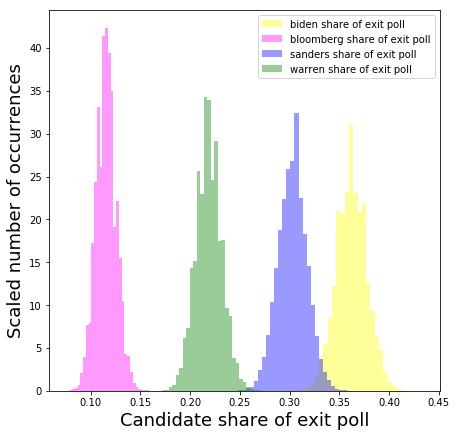

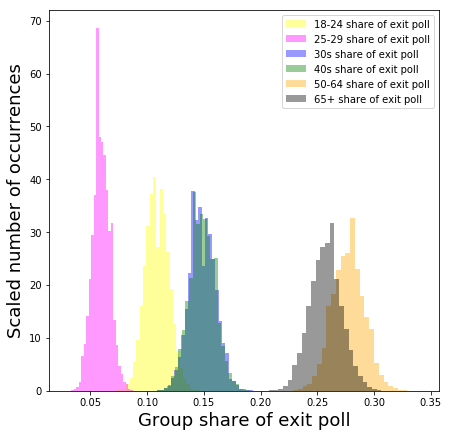

Theoretical (multinomial) covariance between bloomberg (estimated topline vote share: 11.6) and biden (estimated topline vote share: 36.2): -4.197e-05
Empirical covariance between bloomberg (empirical mean share: 11.6) and biden (empirical mean share: 36.3): -4.182e-05
Theoretical (multinomial) covariance between sanders (estimated topline vote share: 30.3) and biden (estimated topline vote share: 36.2): -0.00010983
Empirical covariance between sanders (empirical mean share: 30.3) and biden (empirical mean share: 36.3): -0.00010955
Theoretical (multinomial) covariance between sanders (estimated topline vote share: 30.3) and bloomberg (estimated topline vote share: 11.6): -3.508e-05
Empirical covariance between sanders (empirical mean share: 30.3) and bloomberg (empirical mean share: 11.6): -3.552e-05
Theoretical (multinomial) covariance between warren (estimated topline vote share: 21.9) and biden (estimated topline vote share: 36.2): -7.93e-05
Empirical covariance between warren (empi

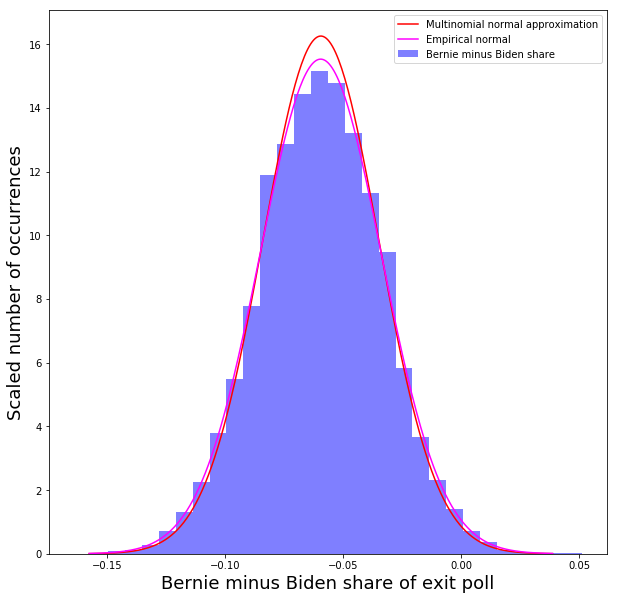

In [11]:
very_very_young = [17, 4, 54, 21]
very_young = [28, 0, 45, 22]
young = [19, 4, 43, 27]
middle = [32, 9, 31, 23]
old = [40, 17, 18, 19]
very_old = [47, 15, 16, 17]
candidate_given_group_list = [very_very_young, very_young, young, middle, old, very_old]
candidate_given_group_list = [np.array(x)/np.sum(x) for x in candidate_given_group_list]
priors = [0.11, 0.06, 0.15, 0.15, 0.28, 0.26]
priors = np.array(priors)/np.sum(priors)
groups = ['18-24', '25-29', '30s', '40s', '50-64', '65+']
run_experiment(N, nexitpolls, candidate_given_group_list, priors, groups)

Finally, let's consider the same scenario as above, but now Edison research is not great at dispatching people to the right polling places at the right times. Rather than encountering voters each drawn independently from the voter groups (the group of a voter, if you recall, is the coin she possesses) using the probabilities in $\texttt{priors}$, let us suppose $\texttt{priors}$ changes a bit from exit poll to exit poll. Let's add a very simple modification: in each sample we randomly perturb each of these probabilities of assignment with small 0.1-percentage-point-variance Gaussian noise, then renormalize.

In [14]:
def get_sample_from_many_populations(N, p_group, p_candidates_given_group):
    # eh, whatever, nobody will read this so I'll make my code easier to write and harder to read
    n_groups = len(p_candidates_given_group)
    n_candidates = len(p_candidates_given_group[0])
    
    ## PERTURBATION:
    p_group = p_group + np.sqrt(0.001)*np.random.randn(n_groups)
    p_group = p_group/np.sum(p_group)
    
    group_random = np.random.uniform(0,1,N)
    groups = np.zeros((N,))
    for prior in np.cumsum(p_group[:-1]):
        groups += group_random <= prior
    groups = (n_groups - 1 - groups).astype('uint8')    
    
    vote_random = np.random.uniform(0,1,N)
    vote_list = np.zeros((N,))
    for group_i, candidate_probs in enumerate(p_candidates_given_group):
        for prob in np.cumsum(candidate_probs[:-1]):
            vote_cand_j_if_group_i = vote_random <= prob
            vote_list += np.multiply(vote_cand_j_if_group_i, groups == group_i)
    vote_list = (n_candidates - 1 - vote_list).astype('uint8')
    
    candidates_nos, vote_counts = np.unique(vote_list, return_counts=True)
    final_vote_counts = np.zeros((n_candidates,))
    for c,v in zip(candidates_nos, vote_counts):
        final_vote_counts[c] = v
    group_nos, group_counts = np.unique(groups, return_counts=True)
    final_group_counts = np.zeros((n_groups,))
    for c,v in zip(group_nos, group_counts):
        final_group_counts[c] = v

    return final_group_counts, final_vote_counts

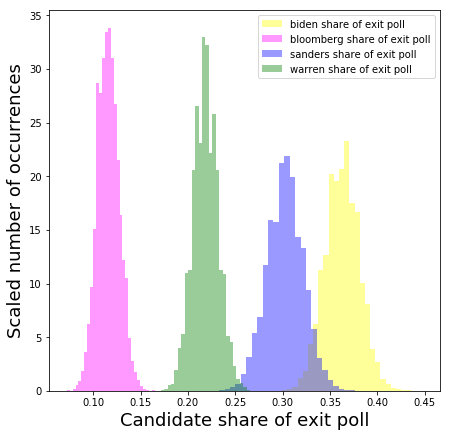

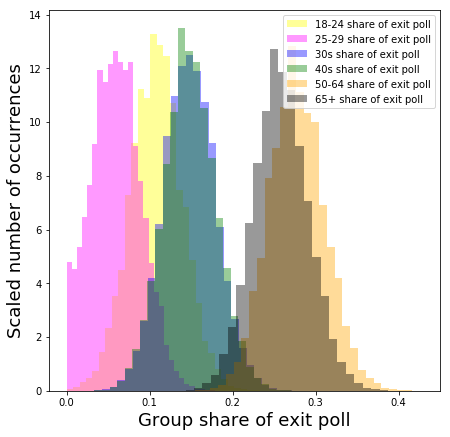

Theoretical (multinomial) covariance between bloomberg (estimated topline vote share: 11.6) and biden (estimated topline vote share: 36.2): -4.197e-05
Empirical covariance between bloomberg (empirical mean share: 11.6) and biden (empirical mean share: 36.3): 3.35e-06
Theoretical (multinomial) covariance between sanders (estimated topline vote share: 30.3) and biden (estimated topline vote share: 36.2): -0.00010983
Empirical covariance between sanders (empirical mean share: 30.3) and biden (empirical mean share: 36.3): -0.00022316
Theoretical (multinomial) covariance between sanders (estimated topline vote share: 30.3) and bloomberg (estimated topline vote share: 11.6): -3.508e-05
Empirical covariance between sanders (empirical mean share: 30.3) and bloomberg (empirical mean share: 11.6): -0.00010093
Theoretical (multinomial) covariance between warren (estimated topline vote share: 21.9) and biden (estimated topline vote share: 36.2): -7.93e-05
Empirical covariance between warren (empir

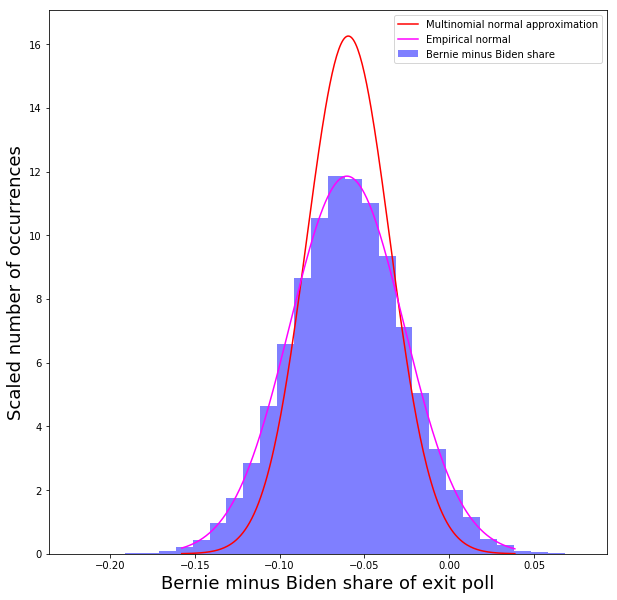

In [15]:
nexitpolls = 50000
very_very_young = [17, 4, 54, 21]
very_young = [28, 0, 45, 22]
young = [19, 4, 43, 27]
middle = [32, 9, 31, 23]
old = [40, 17, 18, 19]
very_old = [47, 15, 16, 17]
candidate_given_group_list = [very_very_young, very_young, young, middle, old, very_old]
candidate_given_group_list = [np.array(x)/np.sum(x) for x in candidate_given_group_list]
priors = [0.11, 0.06, 0.15, 0.15, 0.28, 0.26]
priors = np.array(priors)/np.sum(priors)
groups = ['18-24', '25-29', '30s', '40s', '50-64', '65+']
run_experiment(N, nexitpolls, candidate_given_group_list, priors, groups)

As we can see in very dumb toy examples, when vote counts cannot profitably modeled as multinomial random variables, we're computing the MOE by looking at the wrong density. Here **Biden and Bloomberg votes are *positively* correlated**, grossly violating **a key property of the multinomial assumption.**

In particular, a multinomial random variable assumes that *any pair* of candidates will have negatively correlated vote totals. A quick glance at the exit polls---*and at the specific complaints of the people yelling CORRUPTION* [a]---suggests that Sanders and Warren votes are *positively* correlated: both do well when progressives turn out, or when we undercount young people.


Simply put, **a MOE computed from a spurious multinomial fit to these data is MEANINGLESS.**

[a] "THEY UNDERCOUNTED SANDERS AND WARREN IN FAVOR OF THE MODERATES!"

# The numbers

In the correct, complete exit poll, Biden got 34% and Sanders got 28.2 (using only the gender crosstab). After tallying the votes, Biden got 33.6% and Sanders 26.7%. The Biden minus Sanders difference went from 5.8% in the exit poll to 6.9% between the exit poll and the tally [a]. These numbers are well within any margin of error.

If you introduce error by (1) working with an incomplete (or fabricated) exit poll, (2) introducing a point of rounding error into the computation of the topline numbers [b], and (3) applying a statistical test that is relevant only to the case where vote counts are multinomial random variables and the covariance between any two distinct candidates having vote share of $p$ and $q$ is *negative*---namely, $\frac{-pq}{N}$. 

[a] If we compute the topline numbers using the education crosstab, Biden gets 33.8% of the vote and Sanders 28.7%, we get a difference of 5.1%, but still there's not much difference in the difference---just 1.8 percentage points.
[b] The public can see none of the crosstabs from this exit poll so we can't verify the computations or tell whether computing the topline numbers introduced error.

# Shouting "rigged" is not organizing.

We are winning the *policy* debate. We are winning with young people. But we have not yet figured out how, in the context of a genuinely rigged corporate media environment, to get over the top. We can do better. Shouting "rigged" doesn't help us get better. Shutting down allies critiquing our rhetoric in good-faith and challenging us to do better does not help us win. Being mean does not help us win.

Before every post, please consider how this will help our movement win---how we can bring in new supporters and build capacity without alienating allies on *non-policy* issues. I would much rather concede Twitter dunks than good policy.

We train canvassers to stay on message and invest in field. We need to start thinking of posting as field. We need to train posters to stay on message: even when we don't have a clipboard, people associate us with the campaign.

Posting as individuals in our own voice, not simply repeating what's on the lit, can be good. (The same holds for canvassing too.) We can explain why we're drawn to Bernie (or a downballot candidate) in our own words, citing examples that are important to our community. People care more about what I think about the Green New Deal when I talk to them about my PhD thesis topic.

But when we try to outdo each other in our defense of every campaign tactic and in attacking people who are offering good-faith criticisms of campaign strategy or even policy, we hurt the movement.

Too many people have failed to understand the meaning of #NotMeUs [a]. This movement isn't about Bernie. Personally liking Bernie is not a necessary or sufficient condition for being a good comrade [b]. Being the most defensive of every action the campaign and Bernie have taken doesn't help our movement succeed. Dogpiling on comrades who provide good-faith critiques intended to strengthen our movement doesn't help us succeed [c]. Shouting "everything Bernie has done is perfect so the fact that he isn't winning 100% of votes suggests THIS IS RIGGED" is not a political revolution.

Challenging each other to be more aggressive about jumping on board with conspiracy theories about the DNC is a great way to lose righteously and get those dopamine hits, but wouldn't it be better if we instead got enough people who annoy us on board with our candidate and policy agenda and took over the DNC and, more importantly, won enough sustained power up and down the ballot and in the streets to transform the United States?

Let's win for progressives up and down the ballot.

[a] This is understandable because Jeff Weaver doesn't get it.

[b] Marisol Alcantara won her primary and formally allied with the traitorous IDC like one month after she was a Sanders delegate. Too many state legislators have tried to wispywhitewash their bad record and unaccountability to movements with their Sanders endorsements.

[c] I know of several instances where honest critiques of local campaigns' fundraising ability or burn rate BY SUPPORTERS OF THAT CANDIDATE have been met with "you're a neoliberal who is obsessed with money" or something to that effect.

[d] For some of you, this tip might help: search your retweets about #Russiagate to see how much evidence you actually need to believe something.